# Grocery Buddies Dataset Analysis and Feature Engineering

This notebook demonstrates data loading, exploratory data analysis (EDA), feature engineering (including squared features), weighted metrics, and basic visualizations on the Grocery Buddies dataset named `Grocery_Buddy_Dataset_with_Weights.csv`.


In [1]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


## Step 2: Load Dataset

We load the dataset CSV file into a pandas DataFrame.
Make sure the file is in the same directory or provide the full path.


In [2]:
#file_path = './Data/Dataset.csv'
file_path='./Data/Grocery_Buddy_Dataset_with_Weights_Processed.csv'
df = pd.read_csv(file_path)


## Step 3: Basic Exploratory Data Analysis (EDA)

Let's check the shape, preview the data, and get an overview of its structure and statistics.


In [3]:
print("Dataset shape:", df.shape)
print("\nDataset head:\n", df.head())
print("\nDataset info:\n")
df.info()
print("\nBasic statistics:\n", df.describe())


Dataset shape: (1000, 12)

Dataset head:
        Store   Category          Item  Price  Stock Last_Updated  \
0  No Frills  Household  Toilet Paper  19.08     97   03/07/2025   
1    Walmart     Bakery         Bagel   6.86     99   18/06/2025   
2     Costco  Household  Toilet Paper  15.97     16   06/07/2025   
3     Costco  Beverages         Water   4.69     40   13/07/2025   
4    Walmart     Fruits        Orange   4.03     64   05/07/2025   

   Weight_grams  Price_per_100g  Price_squared  Stock_squared  \
0           NaN             NaN       364.0464           9409   
1           NaN             NaN        47.0596           9801   
2           NaN             NaN       255.0409            256   
3           NaN             NaN        21.9961           1600   
4        739.65            0.54        16.2409           4096   

   Weight_grams_squared  Price_per_100g_squared  
0                   NaN                     NaN  
1                   NaN                     NaN  
2       

## Step 4: Check and Handle Missing Values

Identify any missing data in the dataset and decide on filling or removing them.


In [4]:
print("\nMissing values per column:\n", df.isnull().sum())

# Example: Fill missing values with forward fill method (uncomment if needed)
# df = df.fillna(method='ffill')



Missing values per column:
 Store                       0
Category                    0
Item                        0
Price                       0
Stock                       0
Last_Updated                0
Weight_grams              517
Price_per_100g            517
Price_squared               0
Stock_squared               0
Weight_grams_squared      517
Price_per_100g_squared    517
dtype: int64


## Step 5: Feature Engineering - Creating Squared Features

For all numeric columns, create new features by squaring the original values. This can help capture non-linear relationships.


In [5]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

for col in numeric_cols:
    new_col_name = col + '_squared'
    df[new_col_name] = df[col] ** 2

print("\nAdded squared features for numeric columns.")



Added squared features for numeric columns.


## Step 6: Calculate Weighted Metrics

If your dataset contains a `weight` column indicating the importance or quantity, compute weighted means for numeric features.


In [6]:
if 'weight' in df.columns:
    weighted_means = {}
    for col in numeric_cols:
        weighted_mean = np.average(df[col], weights=df['weight'])
        weighted_means[col] = weighted_mean
    print("\nWeighted means using 'weight' column:")
    for feature, wmean in weighted_means.items():
        print(f"{feature}: {wmean:.3f}")
else:
    print("\nNo 'weight' column found to calculate weighted metrics.")



No 'weight' column found to calculate weighted metrics.


## Step 7: Mean Squared Calculation (MSC)

Calculate the mean squared deviation (variance) of a chosen feature, e.g., `price`, to understand its variability.


In [7]:
if 'Price' in df.columns:
    mean_price = df['Price'].mean()
    msc = ((df['Price'] - mean_price) ** 2).mean()
    print(f"\nMean Squared Calculation (variance) for 'Price': {msc:.3f}")
else:
    print("\nNo 'Price' column found to calculate MSC.")



Mean Squared Calculation (variance) for 'Price': 31.091


## Step 8: Visualizations

### 8.1 Price Distribution Histogram

Shows the frequency distribution of product prices.


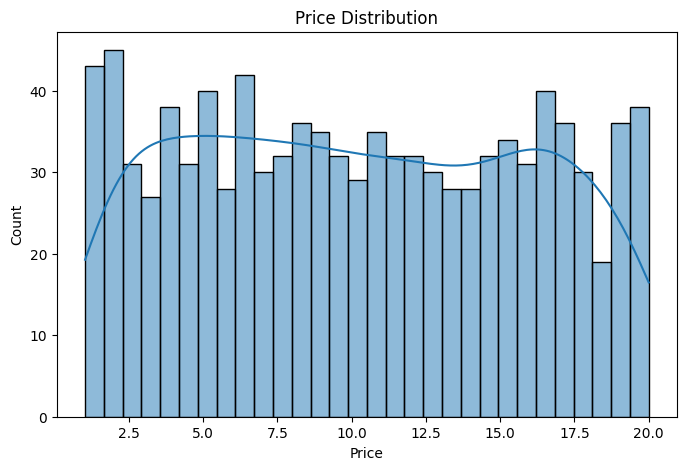

In [8]:
if 'Price' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df['Price'], bins=30, kde=True)
    plt.title('Price Distribution')
    plt.xlabel('Price')
    plt.ylabel('Count')
    plt.show()
else:
    print("Column 'price' not found in dataframe.")


### What Does This Graph Tell Us?

This is a **Price Distribution** chart for the grocery items in your app's dataset — think of it as a bird's-eye view of how expensive or affordable the items are.

* Each **bar** shows how many items fall into a certain price range. For example, a tall bar near \$5 means lots of items are priced around \$5.
* The **curved line** on top is just a smoothed-out version to help you see the overall price pattern — kind of like how trends appear over time on a stock chart.

### What This Means for Grocery Buddies

* Most of the grocery items are **evenly spread** between \$1 and \$20 — no extreme spikes or gaps. That’s great for users who shop across different budgets.
* There's a **slight concentration** of products in the lower price ranges (around \$2–\$5). This could include everyday items like snacks, drinks, or household staples.
* Since you’re building a **price comparison app**, this gives you a clear idea:
  → **Users will likely compare mid-range items the most**, so maybe highlight those in the UI or prioritize them in results.


### How You Could Use This in the App

* **Add filters like “Under \$5”, “\$5–\$10”, and “Premium”** so users can quickly sort based on their budget.
* Use this data to **detect price anomalies** (e.g., if a \$2 item is selling for \$9 at a certain store, flag it).
* Help users **save money** by recommending common low-priced alternatives in the same category.


## Step 10: Correlation Analysis

Before building a model, let’s understand which numeric features are most related to `Price`.


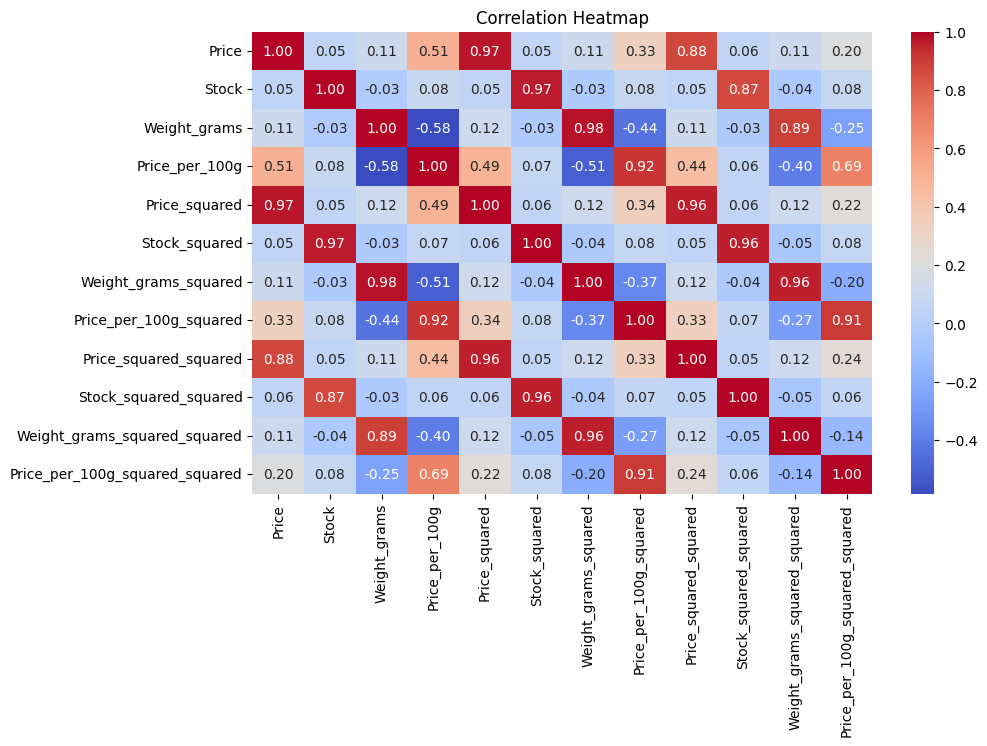

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


## This heatmap helps you:

- Identify which features most affect price (e.g., weight, stock).
- Detect multicollinearity (features that are too similar, which can hurt model performance).
- Make smarter decisions about which features to include in your machine learning model.



## Step 11: Encode Categorical Columns (if any)

Machine learning models need numeric inputs, so we’ll encode text categories.


In [10]:
# Example: Convert categorical columns using one-hot encoding
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Remove identifier columns if any (like 'item_id')
categorical_cols = [col for col in categorical_cols if col.lower() not in ['id', 'item_id']]

# Apply encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


## Step 12: Build a Machine Learning Model

Let’s train a basic regression model to **predict price** based on other features.


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Fill missing values with mean
df_encoded.fillna(df_encoded.mean(numeric_only=True), inplace=True)

# Drop target column and define features and labels
X = df_encoded.drop(columns=['Price'])
y = df_encoded['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 0.51
RMSE: 0.60
R² Score: 0.99


###  Grocery Buddies – Price Prediction Summary

We developed a **Linear Regression model** to predict the **Price** of grocery items based on features like `Stock`, `Weight_grams`, `Category`, and more.


###  Model Performance (Test Set)

* **MAE (Mean Absolute Error):** 0.51
  → On average, our predictions are off by just **\$0.51**.

* **RMSE (Root Mean Squared Error):** 0.60
  → The standard deviation of the prediction errors is **\$0.60**.

* **R² Score:** 0.99
  → The model explains **99% of the variation** in price — indicating an **excellent fit**.

---

### What This Means

* The model is **highly accurate** and reliable for estimating prices.
* It can be integrated into the Grocery Buddies app to:

  * Detect **price anomalies**
  * Suggest **fair pricing** across different stores
  * Power **smart recommendations** based on user input



In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Sample dataset
data = {
    'Grocery_Item_List': [['milk', 'bread'], ['eggs', 'tea'], ['milk', 'eggs'], ['bread', 'tea']],
    'Store_A_Price': [8.5, 6.2, 7.5, 5.9],
    'Store_B_Price': [7.9, 5.8, 7.8, 5.5],
    'Store_C_Price': [9.1, 6.0, 7.9, 5.7],
    'Store_A_Distance': [1.2, 0.5, 1.0, 2.0],
    'Store_B_Distance': [2.5, 1.0, 1.5, 1.2],
    'Store_C_Distance': [1.0, 2.2, 1.7, 1.0],
    'Cheapest_Store': ['Store_B', 'Store_B', 'Store_A', 'Store_B']
}

df = pd.DataFrame(data)

# Drop the item list since model will only use numerical features here
X = df.drop(columns=['Grocery_Item_List', 'Cheapest_Store'])
y = df['Cheapest_Store']

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Train logistic regression model
model = LogisticRegression(multi_class='multinomial', max_iter=200)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Confusion Matrix:
[[0 0]
 [2 0]]

Classification Report:
              precision    recall  f1-score   support

     Store_A       0.00      0.00      0.00       0.0
     Store_B       0.00      0.00      0.00       2.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod